# Winsorizing

1. 백분위수 윈저라이징: 이 접근 방식에서는 특정 백분위수가 윈저라이징의 임계값으로 선택됩니다. 예를 들어, 5번째 백분위수 및 95번째 백분위수는 각각 하한 및 상한 임계값으로 선택할 수 있습니다. 5번째 백분위수 미만의 값은 5번째 백분위수 값으로 대체되고 95번째 백분위수 위의 값은 95번째 백분위수 값으로 대체됩니다.
2. 표준 편차 Winsorizing: 이 접근 방식은 데이터의 표준 편차를 기반으로 합니다. 평균으로부터 특정 수의 표준 편차가 윈소라이징의 임계값으로 선택됩니다. 예를 들어, 아래 값(평균 - k * 표준 편차)은 (평균 - k * 표준 편차)로 대체되고 위 값(평균 + k * 표준 편차)은 (평균 + k * 표준 편차)로 대체됩니다. ).
3. Boxplot 기반 Winsorizing: 이 접근 방식에서 winsorizing의 임계값은 데이터의 사분위수 및 사분위수 범위(IQR)를 기반으로 결정됩니다. 아래의 값(Q1 - k * IQR)은 (Q1 - k * IQR)로 대체되고 위의 값(Q3 + k * IQR)은 (Q3 + k * IQR)로 대체됩니다. 여기서 Q1과 Q3은 다음을 나타냅니다. 제1사분위수와 제3사분위수, k는 선택된 승수입니다.

# Load Library 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis, skew, norm, pearsonr
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import seaborn as sns
from itertools import accumulate
import plotly.graph_objects as go
import os
import warnings
from scipy.stats.mstats import winsorize
from scipy.stats import shapiro, anderson
import math
import statsmodels.api as sm

# Ignore all warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# pd.set_option('display.max_rows', 10)

# Load Dataset

데이터셋을 만들기 위한 데이터셋 구축

In [4]:
kospi_ticker = '000100 KS'
russell_ticker = 'OTLK UR'

In [5]:
df = pd.read_csv(f'/Users/chanj/OneDrive/바탕 화면/Life/datasets-total-ver23060812/datasets-KOSPI200/dataset-KOSPI200-{kospi_ticker}.csv')
df2 = pd.read_csv(f'/Users/chanj/OneDrive/바탕 화면/Life/datasets-total-ver23060812/datasets-RUSSELL3000/dataset-RUSSELL3000-{russell_ticker}.csv')

In [4]:
df = pd.read_csv(f'/Users/admin/Desktop/Life/DataSet_230605/datasets-KOSPI200/dataset-KOSPI200-{kospi_ticker}.csv')
df2 = pd.read_csv(f'/Users/admin/Desktop/Life/DataSet_230605/datasets-RUSSELL3000/dataset-RUSSELL3000-{russel_ticker}.csv')

In [687]:
df = pd.read_csv('/Users/admin/Desktop/Life/DataSet_230605/datasets-KOSPI200/dataset-KOSPI200-323410 KS.csv') # 323410 카카오뱅크
df2 = pd.read_csv('/Users/admin/Desktop/Life/DataSet_230605/datasets-KOSPI200/dataset-KOSPI200-377300 KS.csv') # 377300 카카오페이

In [6]:
df.head()

,date,PX_OPEN,PX_LOW,PX_HIGH,PX_LAST,VOLUME,MOV_AVG_5D,CHG_PCT_1D
0,2015-01-02,23950.0,23950.0,24305.0,24021.0,93579.0,24276.8742,-0.2950
1,2015-01-05,23879.0,23808.0,24163.0,23879.0,146986.0,24191.5925,-0.5917
2,2015-01-06,23879.0,23737.0,24092.0,23737.0,102050.0,24035.2426,-0.5952
3,2015-01-07,23950.0,23524.0,23950.0,23524.0,140731.0,23850.4654,-0.8982
4,2015-01-08,23595.0,23097.0,23737.0,23310.0,329698.0,23694.1155,-0.9063


In [7]:
df2.tail()

,date,PX_OPEN,PX_LOW,PX_HIGH,PX_LAST,VOLUME,MOV_AVG_5D,CHG_PCT_1D
1738,2023-05-25,1.53,1.335,1.530,1.350,163083.0,1.466,-9.3960
1739,2023-05-26,1.41,1.355,1.485,1.475,196185.0,1.493,9.2593
1740,2023-05-30,1.48,1.400,1.520,1.500,220987.0,1.467,1.6949
1741,2023-05-31,1.52,1.400,1.580,1.500,260923.0,1.463,0.0000
1742,2023-06-01,1.51,1.490,1.655,1.630,249650.0,1.491,8.6667


In [310]:
len(df2)

2118

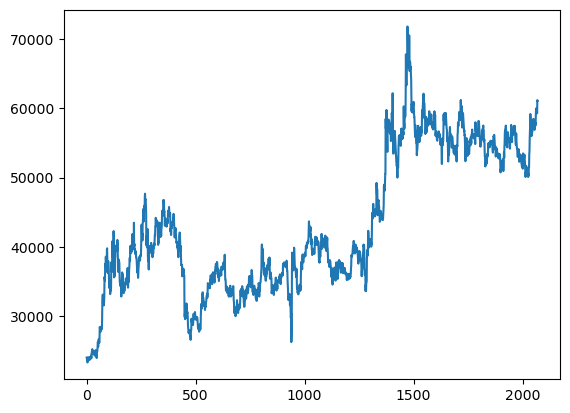

In [8]:
plt.plot(df['PX_LAST'])

Shapiro-Wilk 검정 통계량: 0.9289816617965698
p-value: 2.892857931215442e-30


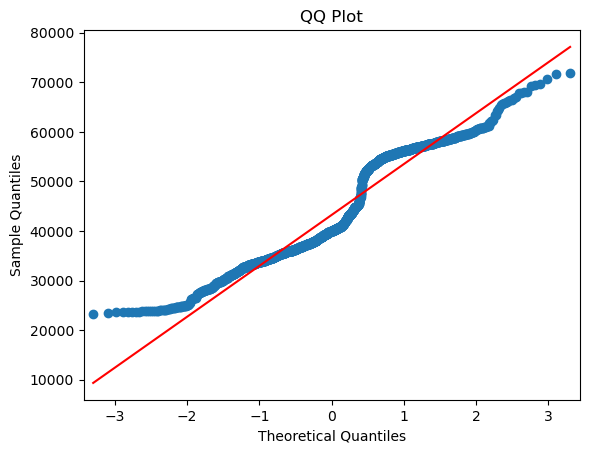

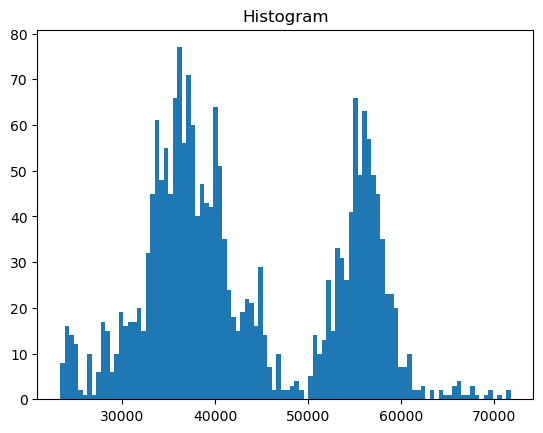

In [12]:
normality_test(df['PX_LAST'])

In [13]:
corr.ks_df

NameError: name 'corr' is not defined

Shapiro-Wilk 검정 통계량: 0.9672191739082336
p-value: 6.787928218115303e-22


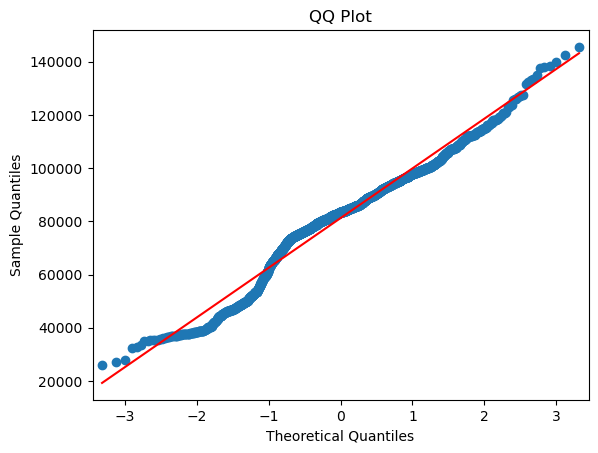

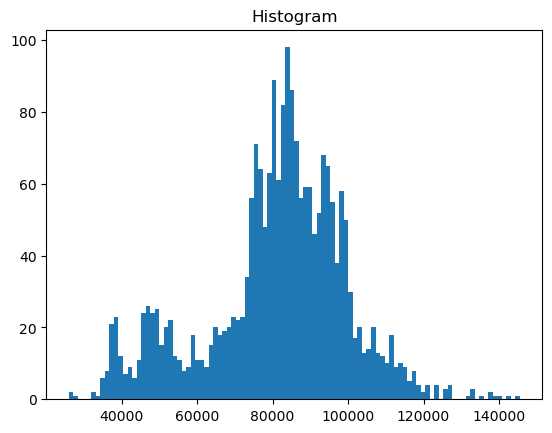

In [348]:
normality_test(corr.ks_df['LOG_CHG_PCT_1D'])

Shapiro-Wilk 검정 통계량: 0.9880278706550598
p-value: 2.69728163415639e-12


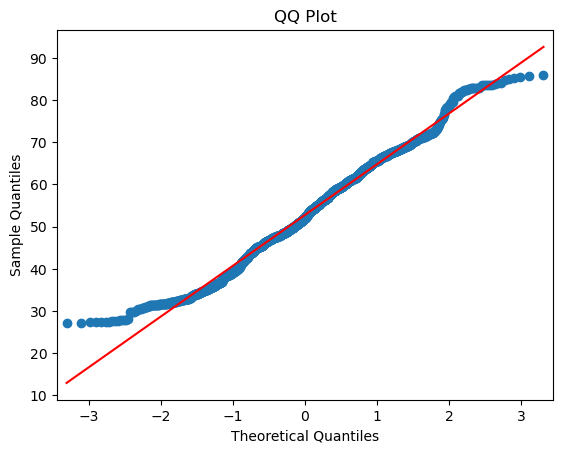

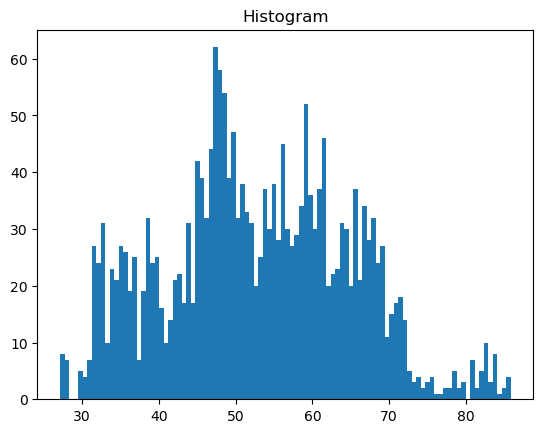

Shapiro-Wilk 검정 통계량: 0.956463098526001
p-value: 1.1488140933612202e-24


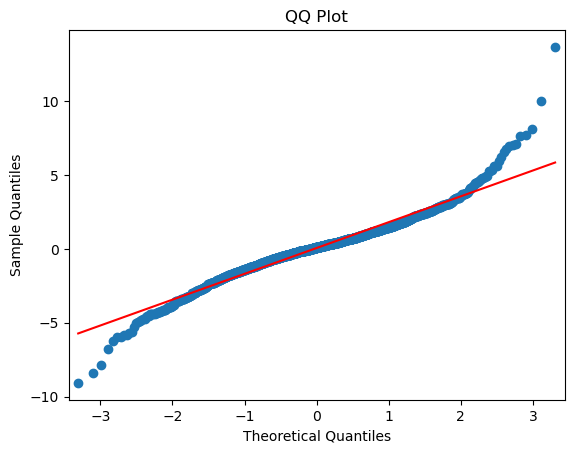

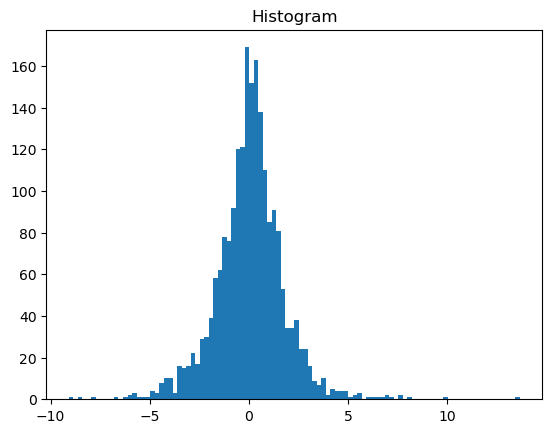

Shapiro-Wilk 검정 통계량: 0.958058774471283
p-value: 3.0431766839422926e-24


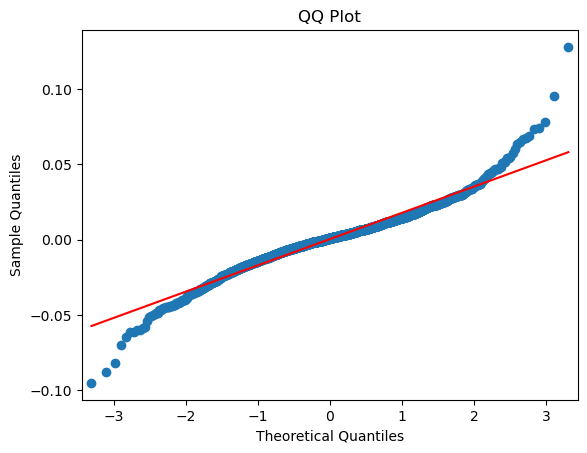

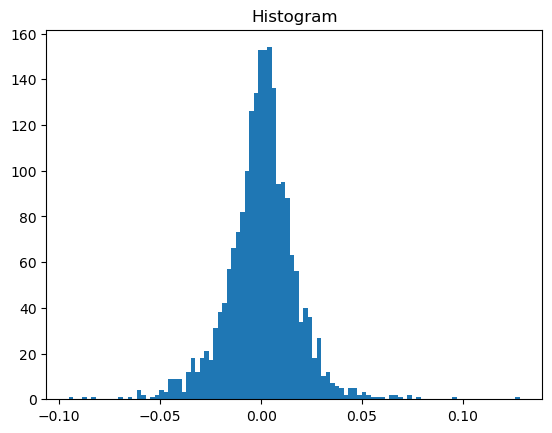

(<__main__.normality_test at 0x17c2b2500>,
 <__main__.normality_test at 0x17c8070a0>)

In [309]:
test_3list(df2)

In [14]:
class make_dataset:
    def __init__(self,df,df2,mode=None):
        self.df = df
        self.df2 = df2
        self.df_dt = self.to_datetime_index(df)
        self.df2_dt = self.to_datetime_index(df2)
        if mode == None: # log
            self.df_dt = self.make_log(self.df_dt)
            self.df2_dt = self.make_log(self.df2_dt)
        elif mode == 'px':
            self.df_dt = self.make_px(self.df_dt)
            self.df2_dt = self.make_px(self.df2_dt)
            
    def to_datetime_index(self, df):
        df['date'] = pd.to_datetime(df['date'])
        df_dt = df.set_index('date', inplace=False)
        return df_dt
    
    def make_log(self, df):
        df['LOG_CHG_PCT_1D'] = np.log(df['CHG_PCT_1D']/100 + 1)
        df_log=df[['LOG_CHG_PCT_1D']]
        return df_log
    
    def make_px(self, df):
        df_px = df[['PX_LAST']]
        df_px.columns=['LOG_CHG_PCT_1D']
        return df_px

In [15]:
dtset = make_dataset(df, df2)

In [16]:
type(dtset.df_dt)

pandas.core.frame.DataFrame

In [17]:
dtset.df_dt.head()

,LOG_CHG_PCT_1D
date,
2015-01-02,-0.002954
2015-01-05,-0.005935
2015-01-06,-0.005970
2015-01-07,-0.009023
2015-01-08,-0.009104


In [18]:
df.isna().sum()

date          0
PX_OPEN       0
PX_LOW        0
PX_HIGH       0
PX_LAST       0
VOLUME        0
MOV_AVG_5D    0
CHG_PCT_1D    0
dtype: int64

In [19]:
df2.isna().sum()

date          0
PX_OPEN       0
PX_LOW        0
PX_HIGH       0
PX_LAST       0
VOLUME        0
MOV_AVG_5D    4
CHG_PCT_1D    1
dtype: int64

In [20]:
df2[df2['CHG_PCT_1D'].isna() == True]

,date,PX_OPEN,PX_LOW,PX_HIGH,PX_LAST,VOLUME,MOV_AVG_5D,CHG_PCT_1D
0,2016-06-14,30.0,29.92,35.76,35.76,80.0,NaN,NaN


In [21]:
dtset.df2_dt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1743 entries, 2016-06-14 to 2023-06-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LOG_CHG_PCT_1D  1742 non-null   float64
dtypes: float64(1)
memory usage: 27.2 KB


In [22]:
# 주가로 하냐 로그 수익률로 하냐에 따라 date_check

class timelag_corr:
    def __init__(self, kospi_df, russel_df, timezone=-1):
        
        # 원본 데이터셋 저장용 -> 한국 주식 window 이동시킬 때 필요
        self.rs_df_org = russel_df[['LOG_CHG_PCT_1D']]
        self.ks_df_org = kospi_df[['LOG_CHG_PCT_1D']]
        
        # 기본적으로 5, 20, 60, 120에 대해서 확인
        self.process(timezone, window_size=5, ks_del_days=0)
        self.process(timezone, window_size=20, ks_del_days=0)
        self.process(timezone, window_size=60, ks_del_days=0)
        self.process(timezone, window_size=120, ks_del_days=0)
    
    # 데이터셋 날짜 조정 위해서 NAN값 없는 첫 번째 행의 날짜 찾기
    def get_first_non_nan_index(self, df, name='이 데이터셋'):
        column = df['LOG_CHG_PCT_1D']
        first_non_nan_index = column[~column.isnull()].index[0] ##
        if first_non_nan_index:
            print(f"{name}의 데이터 시작일은 {first_non_nan_index.strftime('%Y-%m-%d')}입니다") ##
            return first_non_nan_index
        else:
            print(f"{name}의 데이터 시작일은 {column.index[0]}입니다")
            return column.index[0]
        print()

    # 데이터셋의 date 자르기
    # ks_del_days는 한국 window를 과거로 밀고싶은 일 수
    def date_check(self, ks_del_days=0):
        
        # 데이터셋 복사
        self.ks_df = self.ks_df_org.copy()
        self.rs_df = self.rs_df_org.copy()
        
        # 각각 데이터셋의 시작 날짜 만들기
        ks_start_date = self.get_first_non_nan_index(self.ks_df, name='코스피200 종목 데이터셋')
        rs_start_date = self.get_first_non_nan_index(self.rs_df, name='러셀3000 종목 데이터셋')
    
        # 각각 데이터셋 앞부분 자르기 (휴장일 제외하고 완성)
        self.ks_df = self.ks_df.loc[ks_start_date:]
        self.rs_df = self.rs_df.loc[rs_start_date:]
        
        ## 비 공통 휴장일 채우기 ##
        
        # 공통 구간 시작일 구하기
        if ks_start_date >= rs_start_date:
            self.start_date = ks_start_date
        else:
            self.start_date = rs_start_date
    
        # 공통 구간 종료일 구하기
        ks_end_date = self.ks_df['LOG_CHG_PCT_1D'].index[-1]
        rs_end_date = self.rs_df['LOG_CHG_PCT_1D'].index[-1]
      
        if ks_end_date <= rs_end_date:
            self.end_date = ks_end_date
        else:
            self.end_date = rs_end_date
       
        # 비 공통 휴장일 구하기   
        union_ks_df_index = self.ks_df_org.loc[self.start_date:self.end_date].index
        union_rs_df_index = self.rs_df_org.loc[self.start_date:self.end_date].index
           
        # self.rs_df 채우기
        fill_rs_index = list(set(union_ks_df_index) - set(union_rs_df_index))
        self.rs_df = self.rs_df.reindex(self.rs_df.index.union(fill_rs_index))

        self.rs_df.loc[fill_rs_index, 'LOG_CHG_PCT_1D'] = 0 # '로그수익률로 할 때'
#         self.rs_df = self.rs_df.fillna(method='ffill') # '주가로 할 때'
        
        
        # self.ks_df 채우기
        fill_ks_index = list(set(union_rs_df_index) - set(union_ks_df_index))
        self.ks_df = self.ks_df.reindex(self.ks_df.index.union(fill_ks_index))
        self.ks_df.loc[fill_ks_index, 'LOG_CHG_PCT_1D'] = 0
#         self.ks_df = self.ks_df.fillna(method='ffill')
        
        # 한국 주식 데이터셋의 끝부분 자르기
        self.ks_df_non_cut = self.ks_df.copy()
        if ks_del_days != 0:
            self.ks_df = self.ks_df.iloc[:-ks_del_days]
        
        print(f"코스피 데이터셋의 날짜는 {self.ks_df.index[0].strftime('%Y-%m-%d')} ~ {self.ks_df.index[-1].strftime('%Y-%m-%d')}로 설정됐습니다.")
        print(f"러셀 데이터셋의 날짜는 {self.rs_df.index[0].strftime('%Y-%m-%d')} ~ {self.rs_df.index[-1].strftime('%Y-%m-%d')}로 설정됐습니다.")
        print()
        
        # 한국 주식의 모든 인덱스 (datetime 객체)
        all_ks = self.ks_df_non_cut.index
        # 미국 주식의 모든 인덱스
        all_rs = self.rs_df.index
        
        self.all_date_list = sorted(list(set(all_rs)|set(all_ks)))
        
        self.ks_df = self.ks_df.fillna(method='ffill')
        self.rs_df = self.rs_df.fillna(method='ffill')
        
        ### winsorizing
        win_val = 0.05
        ks_winsor = winsorize(self.ks_df['LOG_CHG_PCT_1D'], limits=(win_val, win_val))
        rs_winsor = winsorize(self.rs_df['LOG_CHG_PCT_1D'], limits=(win_val, win_val))
        
        self.ks_df['LOG_CHG_PCT_1D'] = ks_winsor
        self.rs_df['LOG_CHG_PCT_1D'] = rs_winsor
        
    def timelag(self, window_size, timezone):
        
        # 결과를 기록할 df 생성
        result_df = pd.DataFrame()
        
        # 결과를 기록할 리스트 생성 -> df의 열로 쓰임
        corr_list = []
        p_value_list = []
        timelag_list = []
        rs_start_date_list = []
        rs_end_date_list = []
        
        # 한국 주식 윈도우 시리즈 생성
        ks_sr = self.ks_df['LOG_CHG_PCT_1D'].tail(window_size) # pd series
        
        # 미국 주식 윈도우 시리즈 생성을 위한 date_list 생성
        rs_date_list = [x.strftime("%Y-%m-%d") for x in self.rs_df['LOG_CHG_PCT_1D'].index]
   
        rs_start_date_list = rs_date_list[:-window_size+1]
        rs_end_date_list = rs_date_list[window_size-1:]
        
        # for문 돌면서 time lag 수행 및 결과 기록
        for i in range(len(rs_date_list)-window_size+1):
            
            # time lag에 따른 기간 설정 및 미국 주식 윈도우 시리즈 생성
            timelag_end_date = rs_end_date_list[-(i+1)]
            timelag_start_date = rs_start_date_list[-(i+1)]
            
            try:
                rs_sr = self.rs_df['LOG_CHG_PCT_1D'].loc[timelag_start_date:timelag_end_date]
            except:
                timelag_start_date = datetime.strptime(timelag_start_date,'%Y-%m-%d')
                timelag_end_date = datetime.strptime(timelag_end_date,'%Y-%m-%d')
                rs_sr = self.rs_df['LOG_CHG_PCT_1D'].loc[timelag_start_date:timelag_end_date]
            
            # 결과 생성 및 결과 기록
            corr, p_value = pearsonr(ks_sr, rs_sr)
            corr_list.append(corr)
            p_value_list.append(p_value)
            
        # 미국 주식 기준이라 timezone -1 돼있음
        timelag_start = list(self.ks_df_non_cut.index).index(ks_sr.index[-1])-list(self.ks_df_non_cut.index).index(datetime.strptime(rs_end_date_list[-1],'%Y-%m-%d'))+timezone
        timelag_list = list(range(timelag_start,timelag_start+len(rs_end_date_list)))
          
        # 모든 time lag에 대한 결과 담고 있는 df 생성
        result_df['Time Lag'] = timelag_list
        result_df['RS start date'] = rs_start_date_list[::-1]
        result_df['RS end date'] = rs_end_date_list[::-1]
        result_df['corr'] = corr_list
        result_df['p-value'] = p_value_list
        
        print(f'window_size {window_size}일에 대한 상관계수 df가 생성되었습니다.')
        print(f'코스피 200 종목의 비교 period는 {ks_sr.index[0].strftime("%Y-%m-%d")} ~ {ks_sr.index[-1].strftime("%Y-%m-%d")} 입니다')
        
        # final df를 만들기 위한 조건 생성
        corr_condition = (result_df['corr'] >= 0.9
)
        count_corr = corr_condition.sum()
        
        p_value_condition = (result_df['p-value'] <= 0.05)
        count_p_value = p_value_condition.sum()
        
        final_condition = corr_condition & p_value_condition
        count_final = final_condition.sum()
        
        print(f'corr이 0.6 이상인 time lag은 {count_corr}번, p-value가 0.05 이하인 time lag은 {count_p_value}번 존재합니다.')
        print(f'corr 및 p-value 조건을 모두 만족시키는 time lag은 {count_final}번 존재합니다.')
        print()
        
        # final df 만들기
        self.final_result_df = result_df[final_condition]
        self.result_df = result_df
    
    def corr_visual(self,window_size):
        plt.plot(self.result_df['Time Lag'], self.result_df['corr'])
        plt.axhline(y=0.6, color='red', linestyle='--')
        plt.title(f'window_size {window_size}\'s total corr')
        plt.show()
        plt.plot(self.result_df['Time Lag'], self.result_df['p-value'])
        plt.axhline(y=0.05, color='red', linestyle='--')
        plt.title(f'window_size {window_size}day\'s total p-value')
        plt.show()
        
        print()
        print(self.final_result_df)
        print()
        print('-'*90)

    def process(self,timezone, window_size, ks_del_days=0, timelag=None):
        self.date_check(ks_del_days)
        self.timelag(window_size, timezone)
        print(self.final_result_df)
        print()
        print('-'*77)
        if timelag != None:
            print(self.result_df[(self.result_df['Time Lag'] == timelag)])
        return self.result_df
    
    def corr_heatmap(self, timelag, timezone=-1):
        corr_heatmap_df = pd.DataFrame()
        corr_heatmap_error_df = pd.DataFrame()
        
        # 한국 주식의 모든 인덱스 (datetime 객체)
        all_ks = self.ks_df_non_cut.index
        # 미국 주식의 모든 인덱스
        all_rs = self.rs_df.index
        
        self.all_date_list = sorted(list(set(all_rs)|set(all_ks)))
        
        check_num = 0
        
        for ks_last_date in all_ks[1:]:
            ks_index = list(all_ks).index(ks_last_date)
            # 미국 주식 기준이라 timezone -1 돼있음
            rs_index = self.all_date_list.index(ks_last_date)+timezone-timelag
            heat_corr_list = []
            heat_type_list = []
            
            for window_size in range(2,121):
                if rs_index - window_size + 1 <0:
                    heat_corr = np.nan
                    heat_corr_list.append(heat_corr)
                    heat_type_list.append(-100)
                elif self.all_date_list[rs_index-window_size+1] not in self.rs_df.index:
                    heat_corr = np.nan
                    heat_corr_list.append(heat_corr)
                    heat_type_list.append(-100)
                elif window_size > ks_index+1:
                    heat_corr = np.nan
                    heat_corr_list.append(heat_corr)
                    heat_type_list.append(-100)
                else:
                    try:
                        ks_heat_date = all_ks[ks_index+1-window_size:ks_index+1]
                        ks_heat_list = self.ks_df_non_cut.loc[ks_heat_date[0]:ks_heat_date[-1]]['LOG_CHG_PCT_1D']
                        
                        rs_last_date = self.all_date_list[rs_index]
                        rs_first_date = self.all_date_list[rs_index-window_size+1]
                        rs_heat_list = self.rs_df.loc[rs_first_date:rs_last_date]['LOG_CHG_PCT_1D']
                        
                        heat_corr, heat_p_value = pearsonr(ks_heat_list, rs_heat_list)
                        
                        if (window_size==14) & (timelag == 0) & (check_num == 0): ###
                            print('체크용 출력')
                            print(rs_heat_list, ks_heat_list) ###
                            check_num = 1
                        
                        if heat_p_value > 0.05:
                            heat_corr = np.nan
                            heat_type_list.append(0)
                        else:
                            heat_type_list.append(0)
                        heat_corr_list.append(heat_corr)
                        
                    except:
                        heat_corr = np.nan
                        heat_corr_list.append(heat_corr)
                        heat_type_list.append(100)
                        
                        print('문제 발생')
                        print(f'ks: {ks_heat_date[0]} ~ {ks_heat_date[-1]}')
                        print(f'rs: {rs_first_date} ~ {rs_last_date}')
                        print(ks_heat_list)
                        print(rs_heat_list)

            corr_heatmap_df[ks_last_date] = heat_corr_list
            corr_heatmap_error_df[ks_last_date] = heat_type_list
            
            print(window_size)
        
        self.heatmap_df = corr_heatmap_df
        self.heatmap_error_df = corr_heatmap_error_df
        
        return self.heatmap_df
        
    def corr_heatmap_2(self, window_size, timezone=-1):
        
        if window_size < 2:
            return 'window_size small error (<2)'
        
        corr_heatmap_2_df = pd.DataFrame()
        corr_heatmap_2_error_df = pd.DataFrame()
        
        # 한국 주식의 모든 인덱스 (datetime 객체)
        all_ks = self.ks_df_non_cut.index
        # 미국 주식의 모든 인덱스
        all_rs = self.rs_df.index
        
        self.all_date_list = sorted(list(set(all_rs)|set(all_ks)))
        
        window_err_list = []
        
        check_num = 0
        
        for ks_last_date in all_ks[1:]:
            
            heat_corr_list = []
            heat_type_list = []
            
            ks_index = list(all_ks).index(ks_last_date)
            
            if ks_index-window_size+1 >= 0:
                ks_first_date = all_ks[ks_index-window_size+1]
            else:
                window_err_list.append(ks_last_date)
                continue
            
            for timelag in range(0,121):
                # 미국 주식 기준이라 timezone -1 돼있음
                rs_index = self.all_date_list.index(ks_last_date)+timezone-timelag
                rs_last_date = self.all_date_list[rs_index]
                rs_first_date = self.all_date_list[rs_index-window_size+1]
    
                if rs_index-window_size+1 < 0:
                    heat_corr_list.append(np.nan)
                    heat_type_list.append(-100)
                    continue
                    
                elif rs_first_date not in self.rs_df.index:
                    heat_corr = np.nan
                    heat_corr_list.append(heat_corr)
                    heat_type_list.append(-100)
                    continue
                    
                try:
                    ks_heat_list = self.ks_df_non_cut.loc[ks_first_date:ks_last_date]['LOG_CHG_PCT_1D']

                    rs_heat_list = self.rs_df.loc[rs_first_date:rs_last_date]['LOG_CHG_PCT_1D']

                    heat_corr, heat_p_value = pearsonr(ks_heat_list, rs_heat_list)
                    
                    if (window_size==14) & (timelag == 0) & (check_num==0): ###
                        print('체크용 출력')
                        print(rs_heat_list, ks_heat_list) ###
                        check_num = 1
                        
                    if heat_p_value > 0.05:
                        heat_corr = np.nan
                        heat_type_list.append(0)
                    else:
                        heat_type_list.append(0)
                    heat_corr_list.append(heat_corr)
                    
                except:
                    heat_corr = np.nan
                    heat_corr_list.append(heat_corr)
                    heat_type_list.append(100)
                    
                    print('문제 발생')
                    print(f'ks: {ks_first_date} ~ {ks_last_date}')
                    print(f'rs: {rs_first_date} ~ {rs_last_date}')
                    print(ks_heat_list)
                    print(rs_heat_list)
                    
#             print(len(heat_corr_list), len(heat_type_list), ks_last_date)
                    
            corr_heatmap_2_df[ks_last_date] = heat_corr_list
            corr_heatmap_2_error_df[ks_last_date] = heat_type_list
    
        if len(window_err_list) != window_size-2:
            print('데이터 누락 발생')
        
        self.heatmap_2_df = corr_heatmap_2_df
        self.heatmap_2_error_df = corr_heatmap_2_error_df
        
        return self.heatmap_2_df
    
    def corr_heatmap_3(self, timezone=-1, corr=None, ks_last_date=None):
        
        corr_heatmap_3_df = pd.DataFrame()
        corr_heatmap_3_error_df = pd.DataFrame()
    
        # 한국 주식의 모든 인덱스 (datetime 객체)
        all_ks = self.ks_df_non_cut.index
        # 미국 주식의 모든 인덱스
        all_rs = self.rs_df.index
        
        self.all_date_list = sorted(list(set(all_rs)|set(all_ks)))
        
        rs_last_date_err_list = []
        
        if ks_last_date == None:
            ks_last_date = self.ks_df.index[-1]
        
        ks_index = list(self.ks_df.index).index(ks_last_date)
        
        
        for timelag in range(120,-1,-1):   
            
            heat_corr_list = []
            heat_type_list = []
            
            rs_index = self.all_date_list.index(ks_last_date)+timezone-timelag
            rs_last_date = self.all_date_list[rs_index]
                
            if rs_last_date not in self.rs_df.index:
                rs_last_date_err_list.append(rs_last_date)
                continue

            for window_size in range(2,121):
                
                if ks_index-window_size+1 < 0:
                    heat_corr_list.append(np.nan)
                    heat_type_list.append(-100)
                    continue
                    
                ks_first_date = self.ks_df.index[ks_index-window_size+1]
            
                if rs_index-window_size+1 < 0:
                    heat_corr_list.append(np.nan)
                    heat_type_list.append(-100)
                    continue
                    
                rs_first_date = self.all_date_list[rs_index-window_size+1]
                
                if rs_first_date not in self.rs_df.index:
                    heat_corr_list.append(np.nan)
                    heat_type_list.append(-100)
                    continue
                
                try:
                    rs_heat_list = self.rs_df.loc[rs_first_date:rs_last_date]['LOG_CHG_PCT_1D']
                    ks_heat_list = self.ks_df_non_cut.loc[ks_first_date:ks_last_date]['LOG_CHG_PCT_1D']
                    
                    heat_corr, heat_p_value = pearsonr(ks_heat_list, rs_heat_list)
                    
                    if (window_size==14) & (timelag == 0): ###
                        print('체크용 출력')
                        print(rs_heat_list, ks_heat_list) ###
                    
                    if heat_p_value > 0.05:
                        heat_corr = np.nan
                        heat_type_list.append(0)
                    else:
                        heat_type_list.append(0)
                    heat_corr_list.append(heat_corr)
                        
                except:
                    heat_corr = np.nan
                    heat_corr_list.append(heat_corr)
                    heat_type_list.append(100)
                    
                    print('문제 발생')
                    print(f'ks: {ks_first_date} ~ {ks_last_date}')
                    print(f'rs: {rs_first_date} ~ {rs_last_date}')
                    print(ks_heat_list)
                    print(rs_heat_list)
                    
            corr_heatmap_3_df[f'{timelag}t'] = heat_corr_list
            corr_heatmap_3_error_df[f'{timelag}t'] = heat_type_list
        
        self.heatmap_3_df = corr_heatmap_3_df
        self.heatmap_3_error_df = corr_heatmap_3_error_df
        
        index_list = [f'{x}w' for x in range(2,121)]
        
        df = corr_heatmap_3_df
        df.index = index_list
        df_error = corr_heatmap_3_error_df
        df_error.index = index_list
        
        
        if corr != None:
            df_=df.copy()
            df_.values[df_.values >= corr] = 100
            df_.values[df_.values <= -corr] = -100
            matrix = df_.values
        else:
            matrix = df.values
            
        matrix_error = df_error.values
        
        directory = f'/Users/admin/Desktop/Life/{kospi_ticker}_{russel_ticker}'
        if not os.path.exists(directory):
            os.makedirs(directory)
        
        figsize_df = len(df.columns)/len(df)*8

        plt.figure(figsize=(figsize_df, 8))  # Set the size of the heatmap
        sns.heatmap(matrix, cmap="coolwarm")  # Create the heatmap
        plt.title(f'{kospi_ticker} & {russel_ticker} // timelag & window_size // heatmap')  # Set the title of the heatmap
        plt.savefig(f'{directory}/{kospi_ticker}_{russel_ticker}_timelag_windowsize_heatmap.png')
        plt.show()  # Display the heatmap
        
        plt.figure(figsize=(figsize_df, 8))  # Set the size of the heatmap
        sns.heatmap(matrix_error, cmap="coolwarm")  # Create the heatmap     
        plt.title(f'{kospi_ticker} & {russel_ticker} // timelag & window_size // error_heatmap')  # Set the title of the heatmap
        plt.savefig(f'{directory}/{kospi_ticker}_{russel_ticker}_timelag_windowsize_error_heatmap.png')
        plt.show()  # Display the heatmap
        
        fig = go.Figure(data=go.Heatmap(z=matrix, colorscale='RdBu', reversescale=True))
        fig.update_layout(width=240*figsize_df, height=1200)
        fig.update_layout(xaxis=dict(tickvals=list(range(len(df.columns))), ticktext=df.columns, tickmode='array',))
        fig.update_layout(yaxis=dict(autorange='reversed',tickvals=list(range(len(df))), ticktext=df.index, tickmode='array'))    
        fig.update_layout(title=f'{kospi_ticker} & {russel_ticker} // timelag & window_size // heatmap')
        fig.write_html(f'{directory}/{kospi_ticker}_{russel_ticker}_timelag_windowsize_heatmap.html')
        fig.show()
        
        fig = go.Figure(data=go.Heatmap(z=matrix_error, colorscale='RdBu', reversescale=True))
        fig.update_layout(width=240*figsize_df, height=1200)
        fig.update_layout(xaxis=dict(tickvals=list(range(len(df.columns))), ticktext=df.columns, tickmode='array',))
        fig.update_layout(yaxis=dict(autorange='reversed',tickvals=list(range(len(df))), ticktext=df.index, tickmode='array'))   
        fig.update_layout(title=f'{kospi_ticker} & {russel_ticker} // timelag & window_size // error_heatmap')
        fig.write_html(f'{directory}/{kospi_ticker}_{russel_ticker}_timelag_windowsize_error_heatmap.html')
        fig.show()
                    
    def matrix2heatmap(self, mode, nums, timezone=-1, right=None, corr=None):
        if mode == 'timelag=': # timelag 고정
            df = self.corr_heatmap(nums, timezone)
            df_error = self.heatmap_error_df
            print(f'timelag을 {nums}로 고정한 결과입니다.')
            
            index_list = [f'{x}w' for x in range(2,121)]
            df.index = index_list
            df_error.index = index_list
            
        elif mode == 'window=': # window size 고정
            df = self.corr_heatmap_2(nums, timezone)
            df_error = self.heatmap_2_error_df
            print(f'window_size를 {nums}로 고정한 결과입니다.')
            
        else:
            return 'timelag나 window나 last를 맨 첫 변수로 입력'
        
        if right != None:
            df = df.iloc[:, -right:]
            df_error = df_error.iloc[:, -right:]
            
        if corr != None:
            df_=df.copy()
            df_.values[df_.values >= corr] = 100
            df_.values[df_.values <= -corr] = -100
            matrix = df_.values
        else:
            matrix = df.values
            
        self.matrix_df = df
        
        matrix_error = df_error.values
        
        directory = f'/Users/admin/Desktop/Life/{kospi_ticker}_{russel_ticker}'
        if not os.path.exists(directory):
            os.makedirs(directory)
        
        figsize_df = len(df.columns)/len(df)*8

        plt.figure(figsize=(figsize_df, 8))  # Set the size of the heatmap
        sns.heatmap(matrix, cmap="coolwarm")  # Create the heatmap
        plt.title(f'{kospi_ticker} & {russel_ticker} // {mode}{nums} // heatmap')  # Set the title of the heatmap
        plt.savefig(f'{directory}/{kospi_ticker}_{russel_ticker}_{mode}{nums}_heatmap.png')
        plt.show()  # Display the heatmap
        
        plt.figure(figsize=(figsize_df, 8))  # Set the size of the heatmap
        sns.heatmap(matrix_error, cmap="coolwarm")  # Create the heatmap     
        plt.title(f'{kospi_ticker} & {russel_ticker} // {mode}{nums} // error_heatmap')  # Set the title of the heatmap
        plt.savefig(f'{directory}/{kospi_ticker}_{russel_ticker}_{mode}{nums}_error_heatmap.png')
        plt.show()  # Display the heatmap
        
        fig = go.Figure(data=go.Heatmap(z=matrix, colorscale='RdBu', reversescale=True))
        fig.update_layout(width=50*figsize_df, height=800)
        fig.update_layout(xaxis=dict(tickvals=list(range(len(df.columns)))[::10], ticktext=df.columns[::10], tickangle=45, tickmode='array',))
        fig.update_layout(yaxis=dict(autorange='reversed',tickvals=list(range(len(df)))[::10], ticktext=df.index[::10], tickmode='array'))    
        fig.update_layout(title=f'{kospi_ticker} & {russel_ticker} // {mode}{nums} // heatmap')
        fig.write_html(f'{directory}/{kospi_ticker}_{russel_ticker}_{mode}{nums}_heatmap.html')
        fig.show()
        
        fig = go.Figure(data=go.Heatmap(z=matrix_error, colorscale='RdBu', reversescale=True))
        fig.update_layout(width=50*figsize_df, height=800)
        fig.update_layout(xaxis=dict(tickvals=list(range(len(df.columns)))[::10], ticktext=df.columns[::10], tickangle=45, tickmode='array',))
        fig.update_layout(yaxis=dict(autorange='reversed',tickvals=list(range(len(df)))[::10], ticktext=df.index[::10], tickmode='array'))    
        fig.update_layout(title=f'{kospi_ticker} & {russel_ticker} // {mode}{nums} // error_heatmap')
        fig.write_html(f'{directory}/{kospi_ticker}_{russel_ticker}_{mode}{nums}_error_heatmap.html')
        fig.show()
        
    def x_tick_date(self,n_days,date=0,mode=0):
        if mode==0:
            tick_date = self.matrix_df.columns[n_days].strftime("%Y-%m-%d")
            return tick_date
        else:
            date_index = self.all_date_list.index(datetime.strptime(date, "%Y-%m-%d"))
            tick_index = date_index+n_days
            tick_date = self.all_date_list[tick_index].strftime("%Y-%m-%d")
            return tick_date

In [26]:
corr.matrix2heatmap('timelag=',0)

120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120


KeyboardInterrupt: 

체크용 출력
date
2023-05-12   -0.011262
2023-05-15    0.045180
2023-05-16   -0.014178
2023-05-17    0.018501
2023-05-18    0.040008
2023-05-19    0.008841
2023-05-22   -0.028871
2023-05-23   -0.003328
2023-05-24    0.007847
2023-05-25    0.045180
2023-05-26    0.045180
2023-05-30   -0.030768
2023-05-31   -0.047653
2023-06-01    0.012966
Name: LOG_CHG_PCT_1D, dtype: float64 date
2023-05-15   -0.009216
2023-05-16    0.045256
2023-05-17    0.016457
2023-05-18    0.018329
2023-05-19    0.038769
2023-05-22    0.009207
2023-05-23   -0.003060
2023-05-24   -0.002045
2023-05-25    0.057670
2023-05-26    0.053609
2023-05-30    0.010023
2023-05-31   -0.015533
2023-06-01    0.015533
2023-06-02    0.000000
Name: LOG_CHG_PCT_1D, dtype: float64


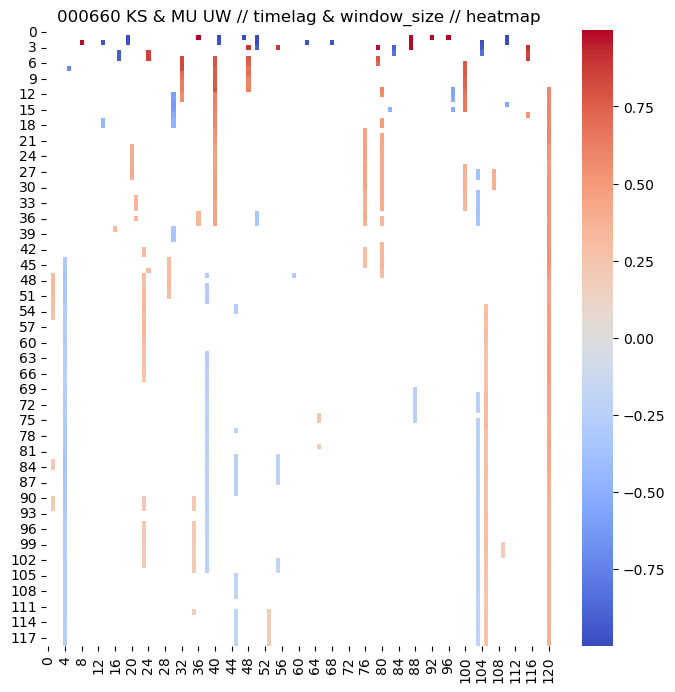

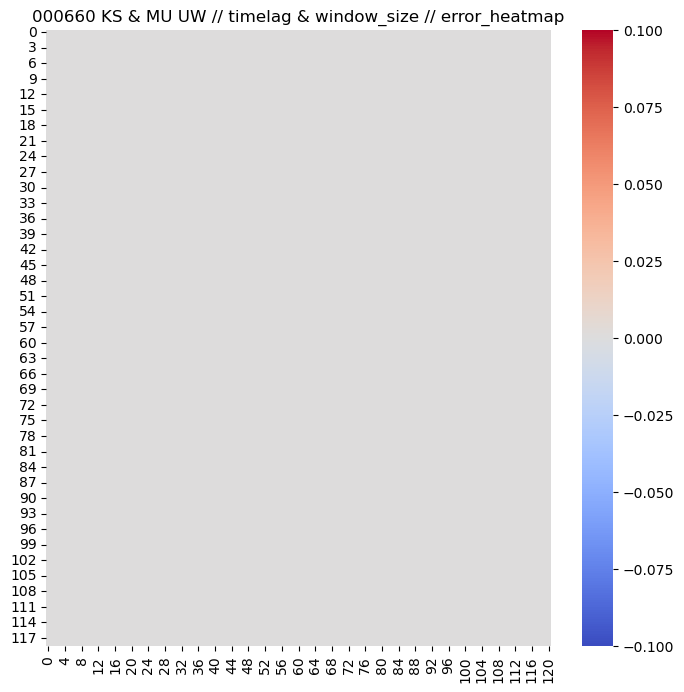

In [1103]:
corr.corr_heatmap_3(timezone=-1, ks_last_date=None)

문제 발생
ks: 2016-05-25 00:00:00 ~ 2016-08-16 00:00:00
rs: 2016-02-08 00:00:00 ~ 2016-04-29 00:00:00
date
2016-05-25    0.007421
2016-05-26   -0.001850
2016-05-27    0.059316
2016-05-30    0.012142
2016-05-31   -0.010399
2016-06-01   -0.006993
2016-06-02   -0.015915
2016-06-03   -0.016173
2016-06-06    0.000000
2016-06-07    0.037337
2016-06-08   -0.003496
2016-06-09    0.015639
2016-06-10    0.000000
2016-06-13   -0.022669
2016-06-14    0.024391
2016-06-15    0.030511
2016-06-16   -0.010068
2016-06-17   -0.022166
2016-06-20    0.035567
2016-06-21   -0.008354
2016-06-22    0.037865
2016-06-23    0.025520
2016-06-24    0.001574
2016-06-27    0.007831
2016-06-28   -0.028483
2016-06-29    0.020652
2016-06-30    0.018692
2016-07-01   -0.007746
2016-07-04    0.018491
2016-07-05   -0.027866
2016-07-06   -0.040037
2016-07-07    0.001633
2016-07-08    0.012967
2016-07-11    0.030137
2016-07-12    0.000000
2016-07-13    0.020109
2016-07-14    0.012177
2016-07-15   -0.010646
2016-07-18    0.001528


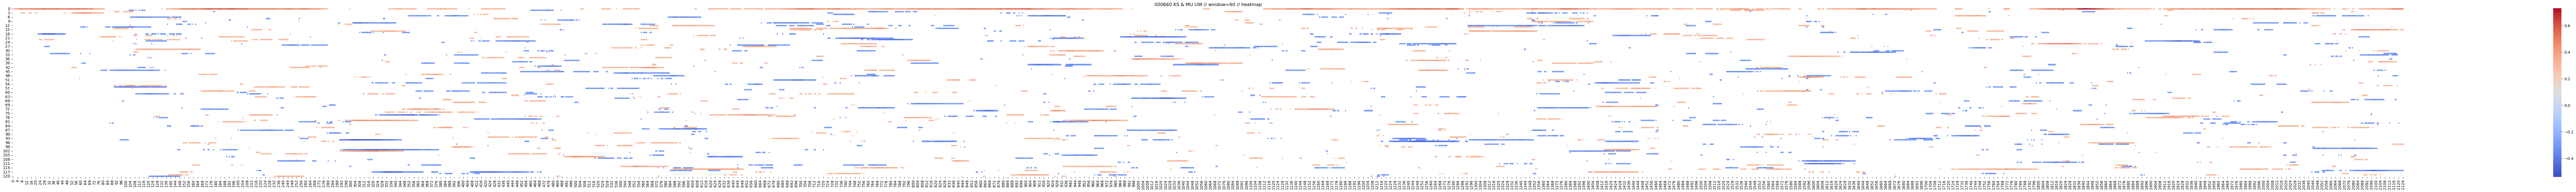

KeyboardInterrupt: 

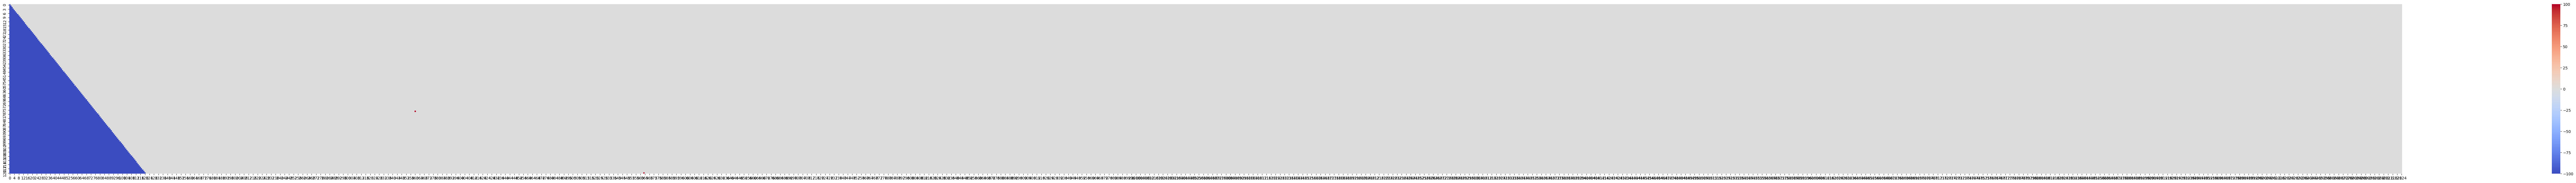

In [14]:
corr.matrix2heatmap('window=',60)

In [25]:
%%capture --no-display
corr = timelag_corr(dtset.df_dt, dtset.df2_dt, -1)

Shapiro-Wilk 검정 통계량: 0.8385613560676575
p-value: 1.394529189795459e-19


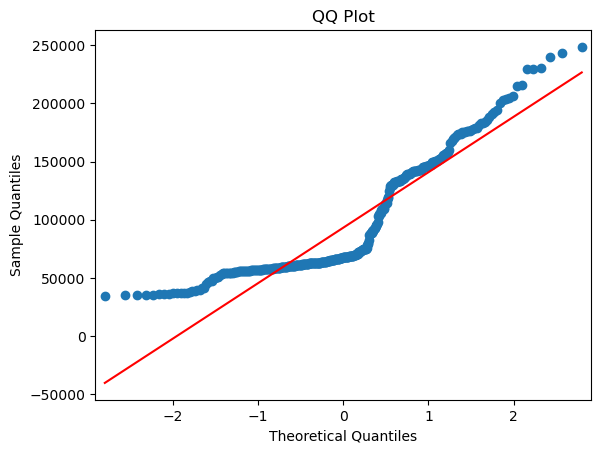

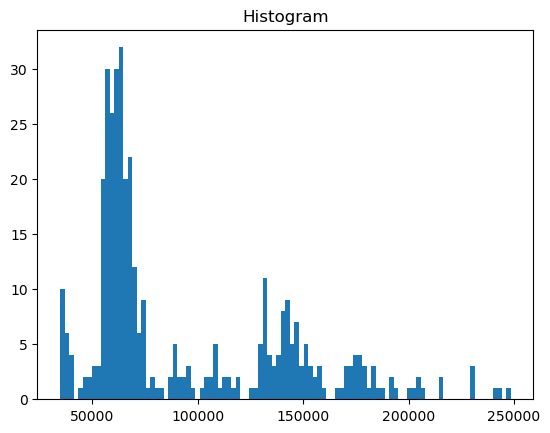

In [702]:
normality_test(corr.rs_df['LOG_CHG_PCT_1D'])

Shapiro-Wilk 검정 통계량: 0.9071304202079773
p-value: 9.13137516040394e-15


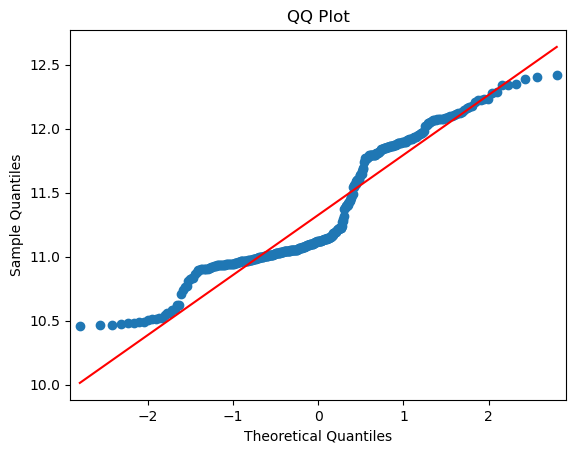

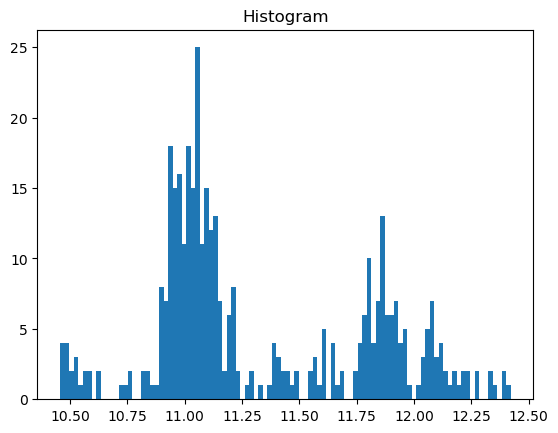

In [703]:
normality_test(np.log(corr.rs_df['LOG_CHG_PCT_1D']))

In [ ]:
def generate_normal_list(mean, std, size):
    data_list = np.random.normal(mean, std, size)
#     plt.hist(data_list, bins=30)
#     plt.show()
    return data_list

norm_set = generate_normal_list(0, 1, 100000)

상관계수 term으로 만들어진 데이터셋 구축

극단치끼리 잘 맞을 때의 영향력이 문제이기 때문에 극단치를 먼저 판별해내야하는데 극단치의 기준은?

평균적인 극단치 분포를 확인하기 위해 데이터셋의 분포 확인

In [27]:
def moment(data):
    
    # Calculate the moments and standard deviation
    mean = np.mean(data)
    variance = np.var(data)
    std_dev = np.std(data)
    skewness = skew(data)
    kurtosis_value = kurtosis(data)

    # Print the moments and standard deviation
    print("Mean:", mean)
    print("Variance:", variance)
    print("Standard Deviation:", std_dev)
    print("Skewness:", skewness)
    print("Kurtosis:", kurtosis_value)
    
    plt.hist(data, bins=100, density=True, alpha=0.7, color='blue', label='Data')
    plt.axvline(x=np.mean(data), color='red', linestyle='--')
    plt.axvline(x=np.median(data), color='green', linestyle='--')
    
    # Generate x-values for the normal distribution curve
    x = np.linspace(min(data), max(data), 100)

    # Compute the PDF of the normal distribution
    pdf = norm.pdf(x, loc=np.mean(data), scale=np.std(data))

    # Plot the normal distribution curve
    plt.plot(x, pdf, color='red', linewidth=2, label='Normal Distribution')
    
    plt.legend()
    
    plt.show()
    
# 정규분포의 기준은 0,1,1,skewness(왜도) 0, kurtosis(첨도) 0 (3빼서)
# 왜도 (+): 양의 방향으로 긴 꼬리
# 첨도 (+): 긴꼬리에 뾰족

In [37]:
src_date = datetime.strptime('2023-03-10', '%Y-%m-%d')
trg_date = datetime.strptime('2023-02-23', '%Y-%m-%d')
period = 60

In [38]:
trg_index = list(corr.ks_df['LOG_CHG_PCT_1D'].index).index(trg_date)
src_index = list(corr.rs_df['LOG_CHG_PCT_1D'].index).index(src_date)

In [39]:
data1 = corr.ks_df[['LOG_CHG_PCT_1D']].iloc[trg_index:trg_index+period]['LOG_CHG_PCT_1D']
data2 = corr.rs_df[['LOG_CHG_PCT_1D']].iloc[src_index:src_index+period]['LOG_CHG_PCT_1D']

In [42]:
len(data2)

59

In [926]:
corr.rs_df[np.abs(corr.rs_df['LOG_CHG_PCT_1D'])>0.1]

,LOG_CHG_PCT_1D
date,
2021-11-03 00:00:00,0.762880
2021-11-04 00:00:00,-0.132791
2021-11-08 00:00:00,-0.102098
2021-11-25 00:00:00,0.168104
2022-06-08 00:00:00,-0.169200
2022-06-13 00:00:00,-0.107845
2022-08-04 00:00:00,0.139356
2022-10-07 00:00:00,-0.155575
2022-11-11 00:00:00,0.261778


## winsorizing 적용

In [34]:
win_val = 0.05

data1_w = winsorize(data1, limits=(win_val, win_val))
data2_w = winsorize(data2, limits=(win_val, win_val))

print(f'양쪽 각각 {math.floor(period*win_val)}개가 차순위값으로 조정')
print()
print(f'{kospi_ticker} 데이터는 {sorted(set(data1)-set(data1_w))}가 각각 {min(set(data1_w))}와 {max(set(data1_w))}로 조정')
print()
print(f'{russell_ticker} 데이터는 {sorted(set(data2)-set(data2_w))}가 각각 {min(set(data2_w))}와 {max(set(data2_w))}로 조정')

양쪽 각각 3개가 차순위값으로 조정

000100 KS 데이터는 [-0.022771309475820047, -0.01911452409349901, -0.017804564753268897, 0.03153742599815616]가 각각 -0.01550457716104153와 0.02787680595427659로 조정

OTLK UR 데이터는 [-0.08910010231293342, -0.07082597917411969]가 각각 -0.0698700418026567와 0.08306643927831082로 조정


분석

Mean: -0.003158702991600642
Variance: 0.0010274518588824584
Standard Deviation: 0.032053889918112255
Skewness: 0.22508589763200665
Kurtosis: -0.4607520911810363


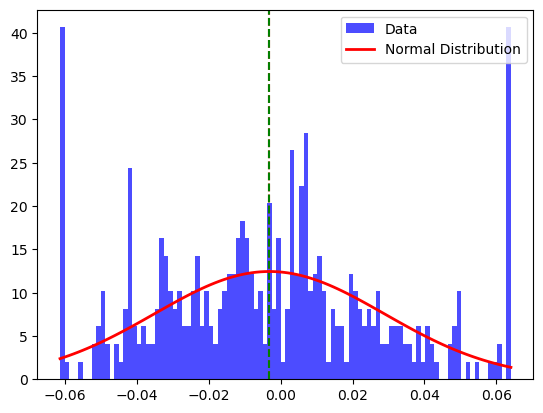

In [929]:
moment(data2_w)

In [10]:
# 정규성 검정 수행

class normality_test:
    def __init__(self, data: list):
        self.data = data
        self.shapiro_test()
        self.qqplot_test()
        self.hist_test()
        
    def shapiro_test(self):
        self.statistic, self.p_value = shapiro(self.data) # Shapiro-Wilk 정규성 검정 수행 
        print("Shapiro-Wilk 검정 통계량:", self.statistic)
        print("p-value:", self.p_value) # p-value가 일반적으로 0.05보다 크면 데이터가 정규분포를 따른다는 귀무가설을 기각하지 않습니다.
        
    def qqplot_test(self): 
        # QQ plot은 데이터의 분위수와 이론적인 정규분포의 분위수를 비교하여 데이터가 정규분포에 얼마나 잘 부합하는지를 보여줍니다.
        sm.qqplot(self.data, line='s') # QQ plot 그리기
        plt.title('QQ Plot')
        plt.show() # 데이터가 정규분포를 따른다면, 점들이 대각선에 가깝게 분포될 것입니다.

    def hist_test(self):
        plt.hist(self.data, bins=100)
        plt.title('Histogram')
        plt.show()

In [11]:
def test_3list(df):
    sr_px_last = df['PX_LAST'].iloc[1:]
    sr_chg_pct = df['CHG_PCT_1D'].iloc[1:]
    log_chg_pct = pd.Series([np.log(1+x/100) for x in sr_chg_pct.tolist()])
    
    return normality_test(sr_px_last), normality_test(sr_chg_pct), normality_test(log_chg_pct)

In [732]:
len(data1_w)

392

Shapiro-Wilk 검정 통계량: 0.977207362651825
p-value: 7.700665264565032e-06


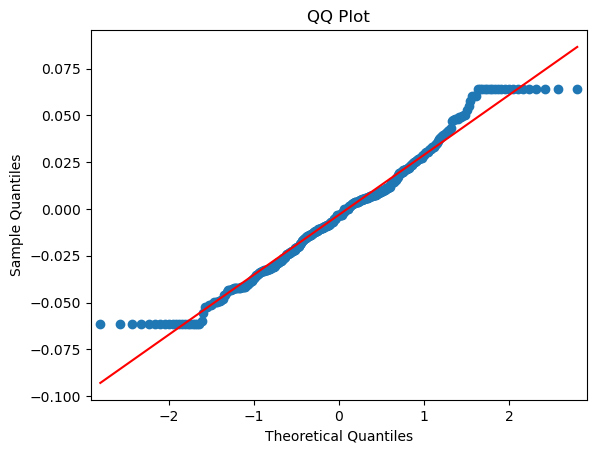

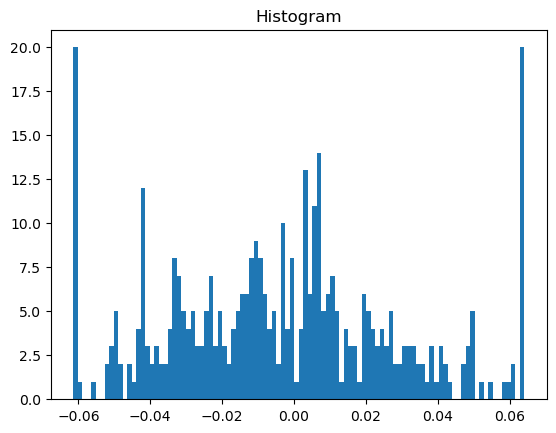

In [930]:
normality_test(data2_w)

In [576]:
len(data2)

75

In [624]:
# px라면 비교를 위해 가격 정규화
scaler = StandardScaler()
data1_std = scaler.fit_transform(np.array(list(data1)).reshape(-1, 1))
data2_std = scaler.fit_transform(np.array(list(data2)).reshape(-1, 1))

In [892]:
data1_acc = list(accumulate(list(data1)))
data2_acc = list(accumulate(list(data2)))

In [628]:
data2_acc

[0.14401202838573843,
 0.14880651643728696,
 0.15084144456591125,
 0.1496917839593382,
 0.14862921963776313,
 0.14942590220191612,
 0.14995676127130342,
 0.14995676127130342,
 0.15066451075753887,
 0.14969103708575884,
 0.14871756341397882,
 0.15101592016744259,
 0.15339708294783552,
 0.15322106745801806,
 0.1557728089945874,
 0.15832455053115674,
 0.15568507016564903,
 0.15550905467583157,
 0.15339181490469705,
 0.15127056664759775,
 0.15224309358992952,
 0.15180099587913629,
 0.15233185494852358,
 0.15312753830854275,
 0.15339250320224468,
 0.1536574680959466,
 0.15250880863919403,
 0.15109280658130783,
 0.1520663325510865,
 0.15171226987829534,
 0.1498525416552713,
 0.15011850628354384,
 0.15153550187093637,
 0.13592732555322115,
 0.13033873845046345,
 0.12508194569456102,
 0.1220784396827864,
 0.12870940615035772,
 0.12271547840252736,
 0.12171297606493788,
 0.1268965182670839,
 0.12280616416303171,
 0.12098350412694182,
 0.11686905136297476,
 0.11933999606314516,
 0.12016265758434

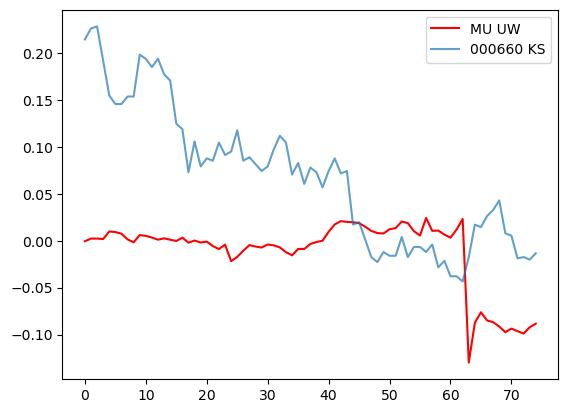

In [1076]:
plt.plot(list(accumulate(list(data2))), color='red', label=russel_ticker)
plt.plot(list(accumulate(list(data1))), alpha=0.7, label=kospi_ticker)
plt.legend()

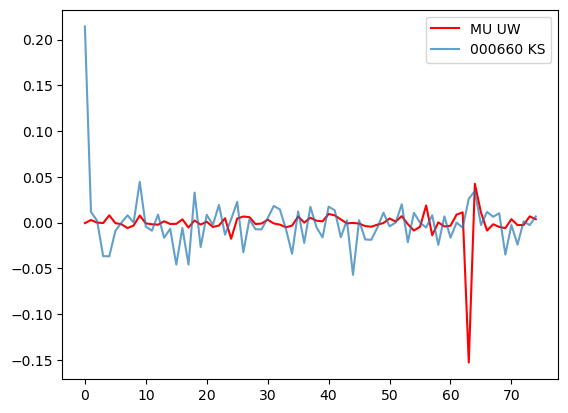

In [1077]:
plt.plot(list(data2), color='red', label=russel_ticker)
plt.plot(list(data1), alpha=0.7, label=kospi_ticker)
plt.legend()

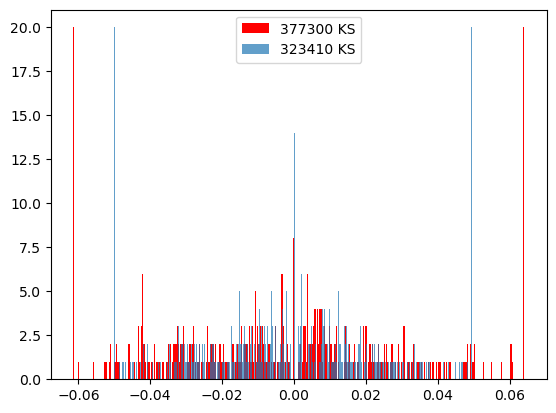

In [934]:
plt.hist(data2_w, bins=392, density=False, color='red', label=russel_ticker)
plt.hist(data1_w, bins=392, density=False, alpha=0.7, label=kospi_ticker)
plt.legend()

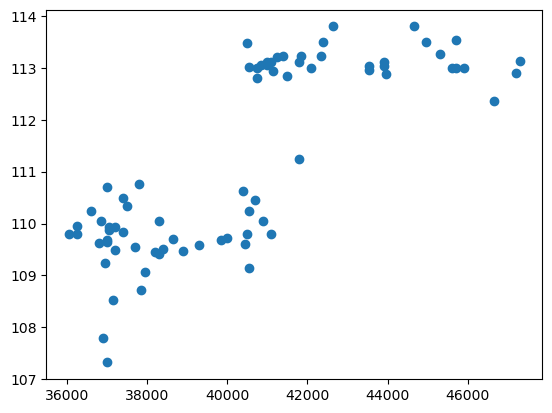

In [540]:
plt.scatter(data1, data2)

In [541]:
fig = go.Figure(data=go.Scatter(x=data1, y=data2, mode='markers', marker=dict(symbol='circle', size=10)))

# Customize the plot
fig.update_layout(
    xaxis_title='X',
    yaxis_title='Y',
    title='Scatter Plot'
)

# Display the plot
fig.show()

### 데이터셋 분포 확인 (극단치 분포 확인)

-> 데이터셋은 term의 데이터셋이다

In [29]:
data1 = corr.ks_df[['LOG_CHG_PCT_1D']].iloc[trg_index:trg_index+period]
data2 = corr.rs_df[['LOG_CHG_PCT_1D']].iloc[src_index:src_index+period]

NameError: name 'trg_index' is not defined

In [417]:
len(data1)

75

In [419]:
len(term_dtset2)

75

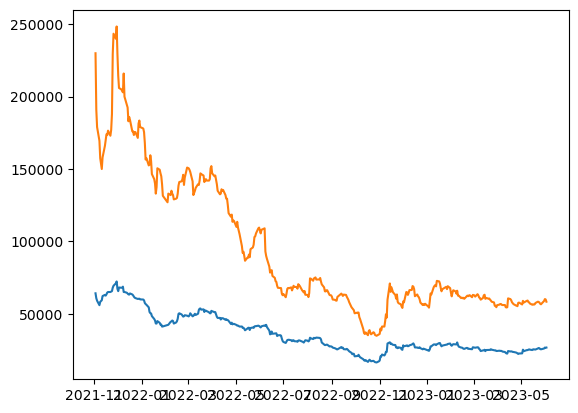

In [720]:
plt.plot(corr.ks_df[-392:])
plt.plot(corr.rs_df[-392:])

In [1002]:
term_dtset2 = make_corr_term_df(corr.ks_df[-75:], corr.rs_df[-75:], win_val=0.05)

수작업으로 계산된 pearonr은 0.26003575128279177입니다.
라이브러리로 계산된 pearsonr은 PearsonRResult(statistic=0.2600357512827918, pvalue=0.024255217015612743)입니다.
두 상관계수는 0.9999999999999998% 일치합니다.


term 절댓값의 최댓값: 0.04628848784028892
term 절댓값의 최솟값: 3.336697816261271e-06
term 절댓값의 평균값: 0.008515134886330539
term 절댓값의 중위값: 0.007844472795532915
term 절댓값의 표준편차값: 0.009371723144706646
최댓값이 평균값보다 5.436025201972602배만큼 큽니다.


수작업으로 계산된 pearonr은 0.26003575128279177입니다.

상위 10개 term의 %는 [17.80081685381395, 13.37038522007693, 13.179060808487977, 12.734013657670856, 11.302174750500434, 9.468228388829292, 9.43652316757448, 7.194841992723094, -7.1897683090736635, 6.4729901001189]입니다.

상위 10개 term은 [0.04628848784028892, 0.0347677816564304, 0.03427026978536768, 0.033112988083177725, 0.0293896950237578, 0.02462077882406282, 0.024538333913776997, 0.018709161429387285, -0.018695968037991773, 0.016832088437304916]입니다.

term의 평균 %는 3.274601605480869입니다.

모든 term의 %합은 100.0입니다.

(+) 상위 5% term(3개)의 합산 상관계수는 0.115326539282087입니다.
(+) 상위 5% term(3개)의 합산 상관계수는 44.35026288237886%입니다.

(-) 상위 5% term(3개)의 합산 상관계수는 -0.04564119252665862입니다.
(-) 상위 5% term(3개)의 합산 상관계수는 -17.551891346287732%입니다.

양쪽 상위 5% term의 합산 상관계수는 0.06968534675542838입니다.
양쪽 상위 5% term의 합산 상관계수는 26.798371536091125%입니다.


In [832]:
len(data1)

75

In [1003]:
term_dtset2 = make_corr_term_df(data1, data2, win_val=0.05)

수작업으로 계산된 pearonr은 0.7830620739074303입니다.
라이브러리로 계산된 pearsonr은 PearsonRResult(statistic=0.78306207390743, pvalue=1.0357024995101747e-16)입니다.
두 상관계수는 1.0000000000000004% 일치합니다.


term 절댓값의 최댓값: 0.03253990761229993
term 절댓값의 최솟값: 9.617476697203727e-06
term 절댓값의 평균값: 0.010608139396670943
term 절댓값의 중위값: 0.009534196699947107
term 절댓값의 표준편차값: 0.008743227445342852
최댓값이 평균값보다 3.0674472115733735배만큼 큽니다.


수작업으로 계산된 pearonr은 0.7830620739074303입니다.

상위 10개 term의 %는 [4.155469750939137, 4.154702831726981, 3.8594012176973087, 3.7508926262114564, 3.6024832816152235, 3.4570012215528467, 3.2853014205537274, 3.152092163294033, 3.0875284617479744, 2.975390624154222]입니다.

상위 10개 term은 [0.03253990761229993, 0.03253390215881203, 0.030221507215709164, 0.02937181758885231, 0.02820968029718462, 0.027070465460496924, 0.02572594943789829, 0.024682838265363844, 0.02417726440504587, 0.023299155528349286]입니다.

term의 평균 %는 1.354699678371217입니다.

모든 term의 %합은 100.00000000000001입니다.

(+) 상위 5% term(3개)의 합산 상관계수는 0.09529531698682112입니다.
(+) 상위 5% term(3개)의 합산 상관계수는 12.169573800363425%입니다.

(-) 상위 5% term(3개)의 합산 상관계수는 -0.004713959384664499입니다.
(-) 상위 5% term(3개)의 합산 상관계수는 -0.6019905115749176%입니다.

양쪽 상위 5% term의 합산 상관계수는 0.09058135760215662입니다.
양쪽 상위 5% term의 합산 상관계수는 11.567583288788507%입니다.


In [979]:
def make_corr_term_df(data1_w, data2_w, df, win_val):
    ks_df = df.copy()

    kr_index = ks_df.index
    
    term_df = pd.DataFrame(index=kr_index)
    term_df['ks_log'] = data1_w
    term_df['rs_log'] = data2_w
    
    ### term 계산 및 시각화
    
    ks_mean = np.mean(term_df['ks_log'])
    rs_mean = np.mean(term_df['rs_log'])
    
    ks_std = np.std(term_df['ks_log'])
    rs_std = np.std(term_df['rs_log'])
    
    term_df['term'] = [(ks-ks_mean)*(rs-rs_mean) / (len(term_df['ks_log'])*ks_std*rs_std) for ks, rs in zip(term_df['ks_log'], term_df['rs_log'])]
    
    print(f'수작업으로 계산된 pearonr은 {sum(term_df["term"])}입니다.')
    print(f'라이브러리로 계산된 pearsonr은 {pearsonr(term_df["ks_log"],term_df["rs_log"])}입니다.')

    print(f'두 상관계수는 {sum(term_df["term"])/pearsonr(term_df["ks_log"],term_df["rs_log"])[0]}% 일치합니다.')
    
    fig = go.Figure(data=go.Scatter(
    x=term_df['ks_log'],
    y=term_df['rs_log'],
    mode='markers',
    marker=dict(
        size=5,
        color=term_df['term'],
        colorscale='Jet',
        colorbar=dict(title='Term'),
        showscale=True
        )
    ))

    fig.update_layout(
        title='Scatter Plot with Color Intensity',
        xaxis=dict(title='ks_log'),
        yaxis=dict(title='rs_log')
    )

    fig.show()
    
    #### histogram
    
    fig = go.Figure(data=[go.Histogram(x=term_df['term'], nbinsx=200)])

    # Update layout
    fig.update_layout(
        title='Histogram',
        xaxis=dict(title='term'),
        yaxis=dict(title='Frequency')
    )

    # Show the histogram
    fig.show()
    
    ### terms 절댓값의 분포
    
    term_df["term_abs"] = np.abs(term_df['term'])
    
    # Update layout
    fig = go.Figure(data=[go.Histogram(x=np.abs(term_df['term']), nbinsx=200)])
    
    fig.update_layout(
        title='Histogram',
        xaxis=dict(title='abs term'),
        yaxis=dict(title='Frequency')
    )

    # Show the histogram
    fig.show()
    
    print(f'term 절댓값의 최댓값: {np.max(term_df["term_abs"])}')
    print(f'term 절댓값의 최솟값: {np.min(term_df["term_abs"])}')
    print(f'term 절댓값의 평균값: {np.mean(term_df["term_abs"])}')
    print(f'term 절댓값의 중위값: {np.median(term_df["term_abs"])}')
    print(f'term 절댓값의 표준편차값: {np.std(term_df["term_abs"])}')
    
    print(f'최댓값이 평균값보다 {np.max(term_df["term_abs"])/np.mean(term_df["term_abs"])}배만큼 큽니다.')
    
    ### 배율의 분포
    
    term_df['term_abs/mean'] = [x/np.mean(np.abs(term_df["term"])) for x in term_df["term_abs"]]

    # Update layout
    fig = go.Figure(data=[go.Histogram(x=term_df['term_abs/mean'], nbinsx=200)])
    
    fig.update_layout(
        title='Histogram',
        xaxis=dict(title='abs term의 mean 대비 배수'),
        yaxis=dict(title='Frequency')
    )

    # Show the histogram
    fig.show()
    
    term_df["term%"] = [x/sum(term_df["term"])*100 for x in term_df["term"]]
    
    # Update layout
    fig = go.Figure(data=[go.Histogram(x=term_df['term%'], nbinsx=200)])
    
    fig.update_layout(
        title='Histogram',
        xaxis=dict(title='term%'),
        yaxis=dict(title='Frequency')
    )

    # Show the histogram
    fig.show()
    
    term_df["term%_abs"] = np.abs(term_df["term%"])
    
    # Update layout
    fig = go.Figure(data=[go.Histogram(x=term_df["term%_abs"], nbinsx=200)])
    
    fig.update_layout(
        title='Histogram',
        xaxis=dict(title='term%_abs'),
        yaxis=dict(title='Frequency')
    )

    # Show the histogram
    fig.show()
    
    print(f'수작업으로 계산된 pearonr은 {sum(term_df["term"])}입니다.')
    print()
    print(f'상위 10개 term의 %는 {sorted(list(term_df["term%"]), key=abs)[-10:][::-1]}입니다.')
    print()
    print(f'상위 10개 term은 {sorted(list(term_df["term"]), key=abs)[-10:][::-1]}입니다.')
    print()
    print(f'term의 평균 %는 {np.mean(np.abs(term_df["term%_abs"]))}입니다.')
    print()
    print(f'모든 term의 %합은 {sum(term_df["term%"])}입니다.')
    print()
    print(f'(+) 상위 {int(win_val*100)}% term({math.floor(len(term_df)*win_val)}개)의 합산 상관계수는 {sum(sorted(list(term_df["term"]))[-math.floor(len(term_df)*win_val):])}입니다.')
    print(f'(+) 상위 {int(win_val*100)}% term({math.floor(len(term_df)*win_val)}개)의 합산 상관계수는 {sum(sorted(list(term_df["term"]))[-math.floor(len(term_df)*win_val):])/sum(term_df["term"])*100}%입니다.')
    print()
    print(f'(-) 상위 {int(win_val*100)}% term({math.floor(len(term_df)*win_val)}개)의 합산 상관계수는 {sum(sorted(list(term_df["term"]))[:math.floor(len(term_df)*win_val)])}입니다.')
    print(f'(-) 상위 {int(win_val*100)}% term({math.floor(len(term_df)*win_val)}개)의 합산 상관계수는 {sum(sorted(list(term_df["term"]))[:math.floor(len(term_df)*win_val)])/sum(term_df["term"])*100}%입니다.')
    print()
    print(f'양쪽 상위 {int(win_val*100)}% term의 합산 상관계수는 {sum(sorted(list(term_df["term"]))[-math.floor(len(term_df)/20):])+sum(sorted(list(term_df["term"]))[:math.floor(len(term_df)*win_val)])}입니다.')
    print(f'양쪽 상위 {int(win_val*100)}% term의 합산 상관계수는 {(sum(sorted(list(term_df["term"]))[-math.floor(len(term_df)/20):])+sum(sorted(list(term_df["term"]))[:math.floor(len(term_df)*win_val)]))/sum(term_df["term"])*100}%입니다.')
    
    term_plus = list(accumulate([x for x in sorted(list(term_df["term%"]), key=abs)[::-1] if x > 0]))
    term_zero = list(accumulate([x for x in sorted(list(term_df["term%"]), key=abs)[::-1] if x == 0]))
    term_minus = list(accumulate([x for x in sorted(list(term_df["term%"]), key=abs)[::-1] if x < 0]))
    term_accum = list(accumulate(sorted(list(term_df["term%"]), key=abs)[::-1]))
    
    # Create traces
    trace_plus = go.Scatter(x=list(range(1,len(term_plus)+1)), y=term_plus, mode='markers',  marker=dict(size=3), name='plus_corr')
    trace_zero = go.Scatter(x=list(range(1,len(term_zero)+1)), y=term_zero, mode='markers', marker=dict(size=3), name='zero_corr')
    trace_minus = go.Scatter(x=list(range(1,len(term_minus)+1)), y=term_minus, mode='markers',marker=dict(size=3), name='minus_corr')
    trace_accum = go.Scatter(x=list(range(1,len(term_accum)+1)), y=term_accum, mode='markers',marker=dict(size=3), name='accum_corr')

    # Create layout
    layout = go.Layout(
        title='Corr% with Lines',
        xaxis=dict(title='X-axis'),
        yaxis=dict(title='Y-axis')
    )

    # Create figure and add traces
    fig = go.Figure(data=[trace_plus, trace_zero, trace_minus, trace_accum], layout=layout)

    # Show the figure
    fig.show()
    
    return term_df

In [980]:
data1 = corr.ks_df[['LOG_CHG_PCT_1D']].iloc[trg_index:trg_index+period]
data2 = corr.rs_df[['LOG_CHG_PCT_1D']].iloc[src_index:src_index+period]

In [981]:
term_dtset = make_corr_term_df(data1_w, data2_w, data1, win_val)

수작업으로 계산된 pearonr은 0.7998398910096769입니다.
라이브러리로 계산된 pearsonr은 PearsonRResult(statistic=0.7998398910096761, pvalue=7.56660341055176e-18)입니다.
두 상관계수는 1.0000000000000009% 일치합니다.


term 절댓값의 최댓값: 0.03224676559874986
term 절댓값의 최솟값: 3.315172895105593e-05
term 절댓값의 평균값: 0.010870473517470013
term 절댓값의 중위값: 0.010326028362758873
term 절댓값의 표준편차값: 0.008311073777628023
최댓값이 평균값보다 2.9664545474422854배만큼 큽니다.


수작업으로 계산된 pearonr은 0.7998398910096769입니다.

상위 10개 term의 %는 [4.031652579623554, 3.482154099230222, 3.464984769519044, 3.3184582061814156, 3.242471766244036, 3.23831764547724, 3.125330445209208, 3.0667597846917944, 3.058100740870051, 2.920275406439405]입니다.

상위 10개 term은 [0.03224676559874986, 0.027851657552072005, 0.027714330404023026, 0.026542352499523116, 0.025934582641145842, 0.02590135632613229, 0.02499763962665358, 0.02452916811940745, 0.02445990963274114, 0.023357527628047336]입니다.

term의 평균 %는 1.3590811910803402입니다.

모든 term의 %합은 99.99999999999993입니다.

(+) 상위 5% term(3개)의 합산 상관계수는 0.08781275355484489입니다.
(+) 상위 5% term(3개)의 합산 상관계수는 10.978791448372819%입니다.

(-) 상위 5% term(3개)의 합산 상관계수는 -0.005562958855715729입니다.
(-) 상위 5% term(3개)의 합산 상관계수는 -0.6955090535298677%입니다.

양쪽 상위 5% term의 합산 상관계수는 0.08224979469912916입니다.
양쪽 상위 5% term의 합산 상관계수는 10.283282394842953%입니다.


여기까지

Mean: 1.3333333333333337
Variance: 25.550638250160844
Standard Deviation: 5.054763916362548
Skewness: 2.5991502960495474
Kurtosis: 8.387776208447207


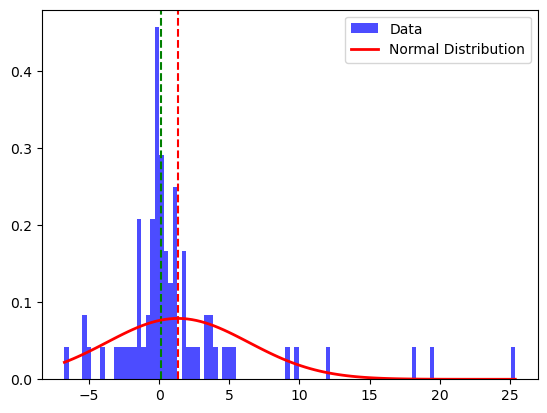

In [301]:
moment(term_dtset['term%'])

Shapiro-Wilk 검정 통계량: 0.22834235429763794
p-value: 6.1000897493866056e-18


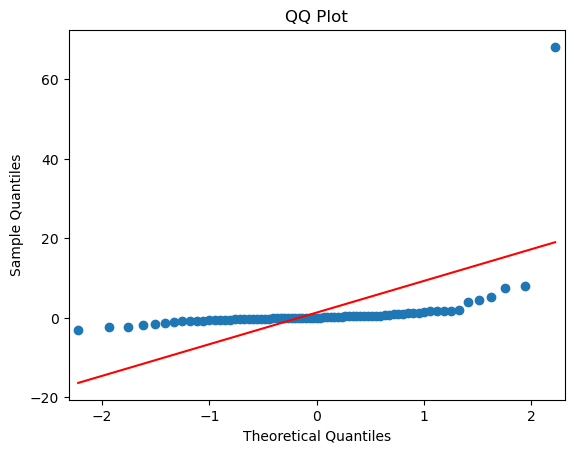

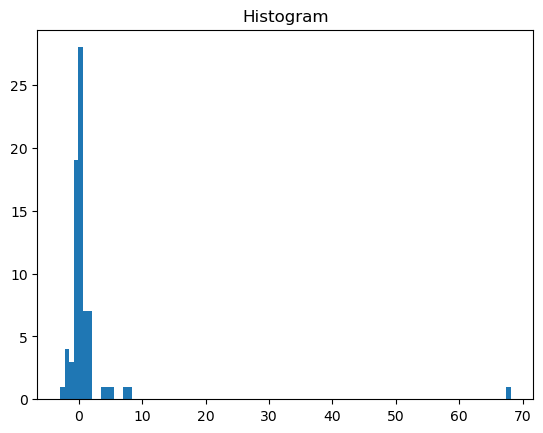

In [235]:
normality_test(term_dtset2['term%'])

In [659]:
sorted(list(term_dtset['term']), key=abs)[::-1]

[0.7631530145834835,
 0.005958022755907321,
 0.00539184972508709,
 0.003290116554484045,
 0.0029696124541724813,
 -0.002940184718919417,
 -0.0027123943664715522,
 0.0024566893250780207,
 0.002368964435865499,
 0.0023622167918136163,
 0.0023056425004118553,
 0.002263250631815116,
 0.0020945694256205498,
 -0.0020905104030936408,
 -0.001976160918155781,
 -0.0018896244100191297,
 0.0018605035946138147,
 -0.0018452660861558567,
 0.0018139894019564861,
 0.001659221590950173,
 0.001636197401182698,
 0.0015119077966831444,
 -0.0014406641440315093,
 0.0013677551688701334,
 0.001289939943520131,
 0.0012860889184789447,
 0.0010580352834337345,
 0.0009912144886086577,
 0.0009819020629569122,
 0.0008993878771170274,
 -0.000890699684980244,
 0.0008827676347185668,
 -0.0008311149915100248,
 -0.0007293013105165433,
 0.0006668692346241165,
 0.0006012672466740751,
 -0.00058789399539962,
 0.0005827403168011696,
 -0.0005704573806457513,
 -0.0005471386599857159,
 0.0004962916139104095,
 -0.0004504954860202

In [660]:
sorted(list(term_dtset[term_dtset['term']<0.7]['term']))[::-1]

[0.005958022755907321,
 0.00539184972508709,
 0.003290116554484045,
 0.0029696124541724813,
 0.0024566893250780207,
 0.002368964435865499,
 0.0023622167918136163,
 0.0023056425004118553,
 0.002263250631815116,
 0.0020945694256205498,
 0.0018605035946138147,
 0.0018139894019564861,
 0.001659221590950173,
 0.001636197401182698,
 0.0015119077966831444,
 0.0013677551688701334,
 0.001289939943520131,
 0.0012860889184789447,
 0.0010580352834337345,
 0.0009912144886086577,
 0.0009819020629569122,
 0.0008993878771170274,
 0.0008827676347185668,
 0.0006668692346241165,
 0.0006012672466740751,
 0.0005827403168011696,
 0.0004962916139104095,
 0.0004154168497363508,
 0.0003891540603169158,
 0.0003750368030366512,
 0.00032499739509954373,
 0.0002867636592727985,
 0.0002620814191452345,
 0.00024474944303444935,
 0.00021548797174007102,
 0.00020697278134049375,
 0.0001522341776286897,
 0.0001476079989791621,
 0.00014037152105669465,
 0.00012517900046784227,
 0.00010697270578831511,
 8.603832789238026

In [661]:
term_dtset_002 = term_dtset[term_dtset['term_abs']<0.7]

In [662]:
pearsonr(term_dtset_002['ks_log'], term_dtset_002['rs_log'])

PearsonRResult(statistic=0.15721757388198543, pvalue=0.18097861233246643)

In [663]:
pearsonr(term_dtset['ks_log'], term_dtset['rs_log'])

PearsonRResult(statistic=0.7958560138863325, pvalue=1.439665137089868e-17)

시각화 2

In [1004]:
sorted_df = term_dtset2.sort_values(by='term_abs')

In [1005]:
sorted_df

,ks_log,rs_log,term,term_abs,term_abs/mean,term%,term%_abs
date,,,,,,,
2023-04-06,40400.0,110.63,-0.000010,0.000010,0.000907,-0.001228,0.001228
2023-04-05,41800.0,111.25,0.000117,0.000117,0.011053,0.014974,0.014974
2023-04-18,40450.0,109.60,-0.000225,0.000225,0.021248,-0.028785,0.028785
2023-04-14,40550.0,110.25,-0.000373,0.000373,0.035118,-0.047574,0.047574
2023-04-12,40500.0,109.79,-0.000374,0.000374,0.035294,-0.047813,0.047813
2023-04-11,40700.0,110.45,-0.000578,0.000578,0.054511,-0.073847,0.073847
2023-03-14,40500.0,113.48,0.000594,0.000594,0.056027,0.075900,0.075900
2023-03-30,40550.0,113.02,0.000696,0.000696,0.065569,0.088826,0.088826
2023-04-19,40550.0,109.15,-0.000797,0.000797,0.075102,-0.101741,0.101741


In [1006]:
corr_list_sort = []
len_list_sort = list(range(3,len(sorted_df)+1))

for i in range(3,len(sorted_df)+1):
    corr_list_sort.append(pearsonr(sorted_df.iloc[:i]['ks_log'],sorted_df.iloc[:i]['rs_log'])[0])

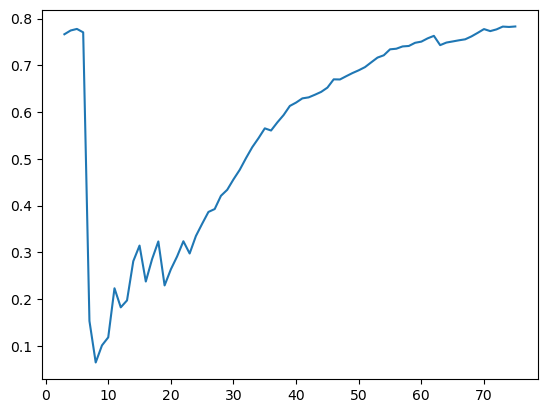

In [1018]:
plt.plot(len_list_sort, corr_list_sort)

In [1019]:
len(corr_list_sort)

73

In [1020]:
differences = [corr_list_sort[i] - corr_list_sort[i-1] for i in range(1, len(corr_list_sort))]

In [1021]:
len(differences)

72

In [1022]:
len(sorted_df)

75

In [1023]:
abs11 = list(sorted_df['term'])[-len(differences):]

In [1024]:
len(abs11)

72

In [1025]:
num_list = list(range(3, len(sorted_df)+1))

In [1026]:
len(num_list)

73

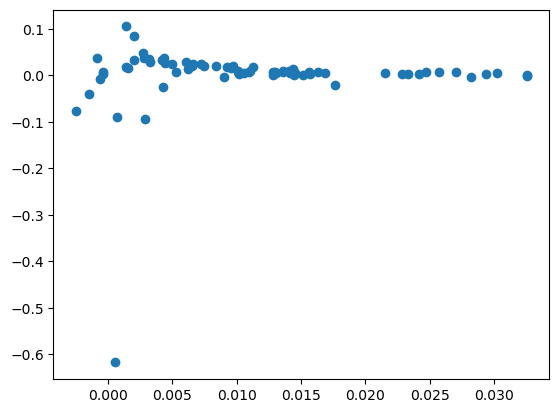

In [1027]:
plt.scatter(abs11, differences)

In [1028]:
# Create traces
trace_dif = go.Scatter(x=num_list, y=differences, mode='markers',  marker=dict(size=5), name='differences')
trace_abs = go.Scatter(x=num_list, y=abs11, mode='markers', marker=dict(size=5), name='abs_term')


# Create layout
layout = go.Layout(
    title='corr_differences with term_nums',
    xaxis=dict(title='X-axis'),
    yaxis=dict(title='Y-axis')
)

# Create figure and add traces
fig = go.Figure(data=[trace_dif, trace_abs], layout=layout)

# Show the figure
fig.show()

In [1030]:
buho = [abs11*dif for dif,abs11 in zip(differences, abs11)]
len(buho)

72

In [1031]:
# Create traces
trace_buho = go.Scatter(x=num_list, y=buho, mode='markers',  marker=dict(size=5), name='differences')


# Create layout
layout = go.Layout(
    title='corr_differences with term_nums',
    xaxis=dict(title='X-axis'),
    yaxis=dict(title='Y-axis')
)

# Create figure and add traces
fig = go.Figure(data=[trace_buho], layout=layout)

# Show the figure
fig.show()